<a href="https://colab.research.google.com/github/s-mallat/FinalProject_AdvCoding3/blob/main/FinalProject_Part2_SaliMallat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FINAL PROJECT**
Sali Mallat / 20040127 <br>
Advanced Coding 3: Exploring Machine Intelligence <br>
MSc Creative Computing <br><br>
<hr>


### **ATTRIBUTIONS**

The code and all imported models in this notebook are attributed to [Jun-Yan Zhu](https://github.com/junyanz) and [Taesung Park](https://github.com/taesungp). 
<br>
While this code has been modified by me, please note that I have also used other external source code which I reference when used through out this notebook. Lastly, note that any code not referenced within the code block itself belongs to the original creators of this notebook (Jun-Yan Zhu and Taesung Park).

    Copyright (c) 2017, Jun-Yan Zhu and Taesung Park.
    All rights reserved.

    Redistribution and use in source and binary forms, with or without
    modification, are permitted provided that the following conditions are met:

    * Redistributions of source code must retain the above copyright notice, this
      list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above copyright notice,
      this list of conditions and the following disclaimer in the documentation
      and/or other materials provided with the distribution.

    THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
    AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
    IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
    DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
    FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
    DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
    SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
    CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
    OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
    OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

**Link to Original Github Repo:**

    https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

**For Additional Information on this Model:**

    Zhu, J.Y., Park, T., Isola, P. and Efros, A.A., 2017. Unpaired image-to-image translation using cycle-consistent adversarial networks. In Proceedings of the IEEE international conference on computer vision (pp. 2223-2232).


<hr>

### **PROJECT BREAKDOWN**

Create a few calligraphy sketches ---> Load to StyleGAN2 ADA Notebook
---> Generate images in the same style I use ---> Use the generated Images as a new dataset for a CycleGAN ---> To pair images, use AFHQ dataset from Kaggle
---> Load new dataset to CycleGAN to create a style transfer ---> Use Generated results to create a new transfer to the Flower Dataset from Kaggle ---> Generate Images

### **STEP 01: <br>INSTALLATION**

In [1]:
#Step 1.1
#Clone Github repo by Jun-Yan Zhu and Taesung Park [contains all the necessary files and models]

!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2447, done.
remote: Total 2447 (delta 0), reused 0 (delta 0), pack-reused 2447
Receiving objects: 100% (2447/2447), 8.18 MiB | 12.05 MiB/s, done.
Resolving deltas: 100% (1535/1535), done.


In [2]:
#Step 1.2
#Change current directory

import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [3]:
#Step 1.3
#Install torch, torchvision, dominate, visdom, wandb

!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 676 kB 6.7 MB/s 
     |████████████████████████████████| 1.8 MB 44.5 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 145 kB 50.4 MB/s 
     |████████████████████████████████| 181 kB 50.8 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=ab80f4314b750a15ec46b83c890ac74f360a4f9454364929e3ec24184de278ae
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=1db1b06eddaf0488ae60fd6ce0211c88563490c7ea24c98b463f3153b315db60
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
  Created wheel for torchfile: filen

### **STEP 02: <br>LOAD DATASET + TRAINING <BR> STYLE TRANSFER: FIRST ROUND**

In [4]:
#Step 2.1
#Cloning my Github repo containing the paired datasets.

!git clone https://github.com/s-mallat/FinalProject_AdvCoding3

Cloning into 'FinalProject_AdvCoding3'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 92 (delta 9), reused 88 (delta 8), pack-reused 0
Unpacking objects: 100% (92/92), done.


In [5]:
#Step 2.2
#Upzip dataset folders from the cloned repo

zip_path = "/content/pytorch-CycleGAN-and-pix2pix/FinalProject_AdvCoding3/CycleGAN_Dataset_R.zip"
zip_path2 = "/content/pytorch-CycleGAN-and-pix2pix/FinalProject_AdvCoding3/generated2colorful.zip"


!unzip {zip_path} -d /content/pytorch-CycleGAN-and-pix2pix/datasets
!unzip {zip_path2} -d /content/pytorch-CycleGAN-and-pix2pix/datasets

Archive:  /content/pytorch-CycleGAN-and-pix2pix/FinalProject_AdvCoding3/CycleGAN_Dataset_R.zip
   creating: /content/pytorch-CycleGAN-and-pix2pix/datasets/CycleGAN_Dataset_R/
  inflating: /content/pytorch-CycleGAN-and-pix2pix/datasets/CycleGAN_Dataset_R/.DS_Store  
  inflating: /content/pytorch-CycleGAN-and-pix2pix/datasets/__MACOSX/CycleGAN_Dataset_R/._.DS_Store  
   creating: /content/pytorch-CycleGAN-and-pix2pix/datasets/CycleGAN_Dataset_R/testA/
   creating: /content/pytorch-CycleGAN-and-pix2pix/datasets/CycleGAN_Dataset_R/trainB/
   creating: /content/pytorch-CycleGAN-and-pix2pix/datasets/CycleGAN_Dataset_R/testB/
   creating: /content/pytorch-CycleGAN-and-pix2pix/datasets/CycleGAN_Dataset_R/trainA/
  inflating: /content/pytorch-CycleGAN-and-pix2pix/datasets/CycleGAN_Dataset_R/testA/.DS_Store  
  inflating: /content/pytorch-CycleGAN-and-pix2pix/datasets/__MACOSX/CycleGAN_Dataset_R/testA/._.DS_Store  
  inflating: /content/pytorch-CycleGAN-and-pix2pix/datasets/CycleGAN_Dataset_R/te

In [6]:
#Step 2.3
#Find the parameters to change the total epoch number to 100 [default is 200 --n_epochs 100 and --n_epochs_decay 100]

!python train.py --help

usage: train.py [-h] --dataroot DATAROOT [--name NAME] [--use_wandb]
                [--gpu_ids GPU_IDS] [--checkpoints_dir CHECKPOINTS_DIR]
                [--model MODEL] [--input_nc INPUT_NC] [--output_nc OUTPUT_NC]
                [--ngf NGF] [--ndf NDF] [--netD NETD] [--netG NETG]
                [--n_layers_D N_LAYERS_D] [--norm NORM]
                [--init_type INIT_TYPE] [--init_gain INIT_GAIN] [--no_dropout]
                [--dataset_mode DATASET_MODE] [--direction DIRECTION]
                [--serial_batches] [--num_threads NUM_THREADS]
                [--batch_size BATCH_SIZE] [--load_size LOAD_SIZE]
                [--crop_size CROP_SIZE] [--max_dataset_size MAX_DATASET_SIZE]
                [--preprocess PREPROCESS] [--no_flip]
                [--display_winsize DISPLAY_WINSIZE] [--epoch EPOCH]
                [--load_iter LOAD_ITER] [--verbose] [--suffix SUFFIX]
                [--display_freq DISPLAY_FREQ] [--display_ncols DISPLAY_NCOLS]
                [--display_id D

In [7]:
#Step 2.4
#Training the Model on a Calligraphy dataset that I generated from a smaller dataset created by me and loaded into a StyleGAN2 model

!python train.py --dataroot ./datasets/CycleGAN_Dataset_R --name styleTransfer --model cycle_gan --n_epochs 100 --n_epochs_decay 0

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/CycleGAN_Dataset_R 	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

### **STEP 03: <br>TESTING MODEL**

In [8]:
#Step 3.1
#Rename checkpoint latest_net_G_A.pth ---> latest_net_G.pth
#Source: https://www.guru99.com/python-rename-file.html

os.rename("/content/pytorch-CycleGAN-and-pix2pix/checkpoints/styleTransfer/latest_net_G_A.pth", "/content/pytorch-CycleGAN-and-pix2pix/checkpoints/styleTransfer/latest_net_G.pth")

In [155]:
#Step 3.2
#Testing using --model cycle_gan for results in 2 directions, for 1 direction only use --model test

!python test.py --dataroot datasets/CycleGAN_Dataset_R/ --name styleTransfer --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/CycleGAN_Dataset_R/  	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [128]:
os.mkdir("/content/pytorch-CycleGAN-and-pix2pix/checkpoints/styleTransfer2")

In [129]:
shutil.copyfile("/content/pytorch-CycleGAN-and-pix2pix/checkpoints/styleTransfer/45_net_G_A.pth", "/content/pytorch-CycleGAN-and-pix2pix/checkpoints/styleTransfer2/45_net_G_A.pth")

'/content/pytorch-CycleGAN-and-pix2pix/checkpoints/styleTransfer2/45_net_G_A.pth'

In [130]:
os.rename("/content/pytorch-CycleGAN-and-pix2pix/checkpoints/styleTransfer2/45_net_G_A.pth","/content/pytorch-CycleGAN-and-pix2pix/checkpoints/styleTransfer2/latest_net_G.pth")

In [131]:
#Step 3.3
#Testing StyleTransfer 2

!python test.py --dataroot datasets/CycleGAN_Dataset_R/ --name styleTransfer2 --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/CycleGAN_Dataset_R/  	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

Text(0.5, 1.0, 'Style Transfer: Second Round')

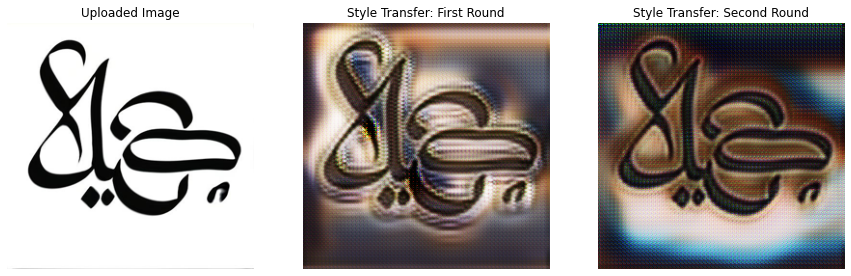

In [133]:
#Step 3.4
#Plot the results

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

rows = 2
columns = 3

img = plt.imread('./results/styleTransfer/test_latest/images/fakes000104_real.png')
img2 = plt.imread('./results/styleTransfer/test_latest/images/fakes000104_fake.png')
img3 = plt.imread('./results/styleTransfer2/test_latest/images/fakes000104_fake.png')

fig.add_subplot(rows, columns, 1)

plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('off')
plt.title("Style Transfer: First Round")

fig.add_subplot(rows, columns, 3)

plt.imshow(img3)
plt.axis('off')
plt.title("Style Transfer: Second Round")

In [134]:
#Step 5.4
#Plot the results
#Source: https://kanoki.org/2021/05/11/show-images-in-grid-inside-jupyter-notebook-using-matplotlib-and-numpy/

import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image


def img_reshape(img):
    img = Image.open(f'/content/pytorch-CycleGAN-and-pix2pix/results/styleTransfer2/test_latest/images/{img}').convert('RGB')
    img = img.resize((300,300))
    img = np.asarray(img)
    return img

images = os.listdir('/content/pytorch-CycleGAN-and-pix2pix/results/styleTransfer2/test_latest/images/')
img_arr = []

for image in images:
  img_arr.append(img_reshape(image))

np.array(img_arr).shape


(100, 300, 300, 3)

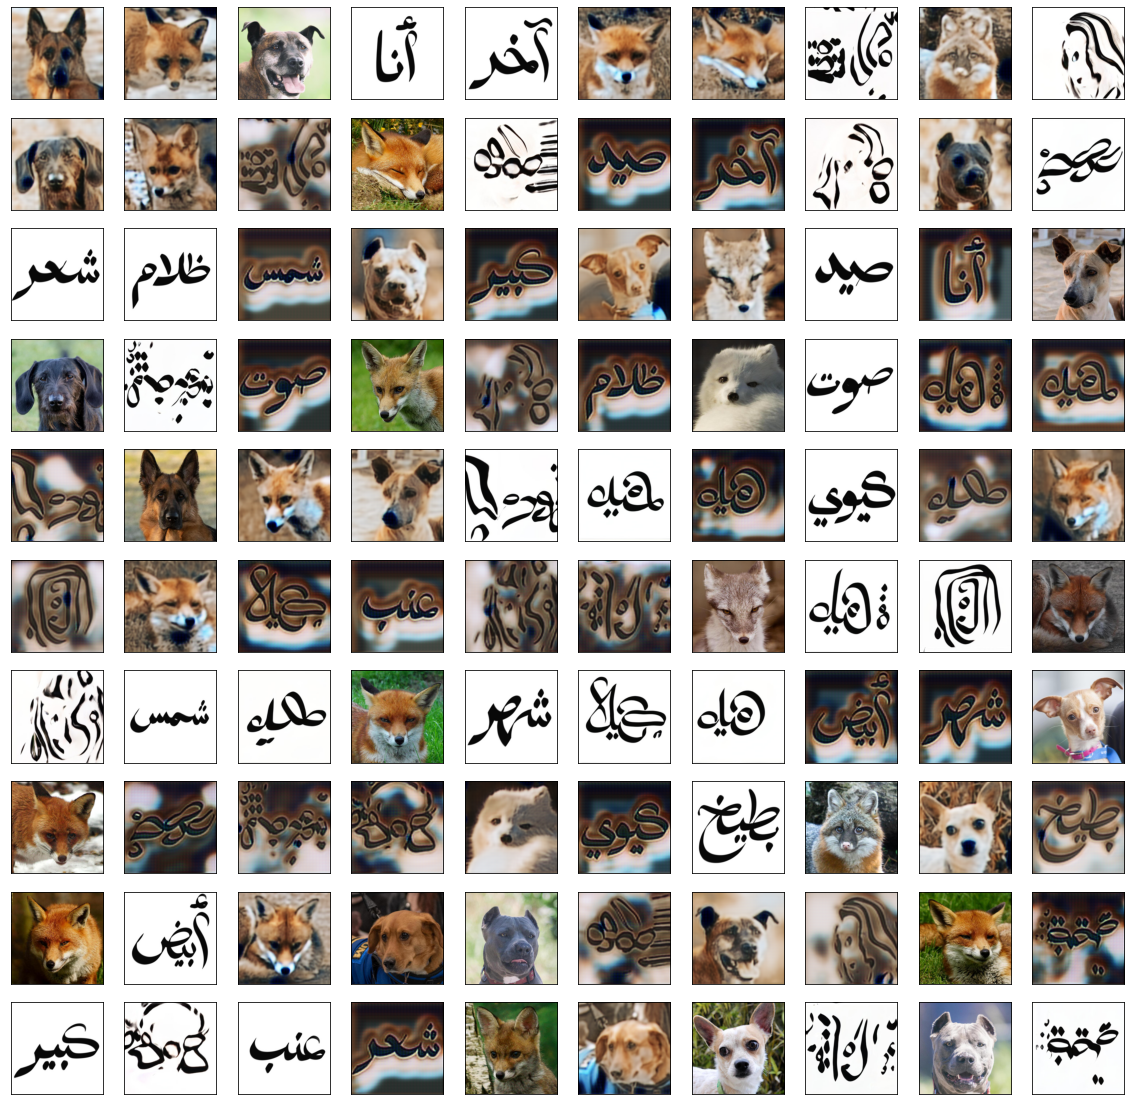

In [135]:
#Step 5.5
#Plot the results in a grid
#Source: https://colab.research.google.com/github/jasper-zheng/colab-snippets/blob/main/aw_code_snippets.ipynb#scrollTo=h5RmA9ywA4a-

plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(img_arr)[i])
plt.show()

In [150]:
#Step 5.6
#Style Transferring on my own published lettering work

!python test.py --dataroot datasets/generated2colorful/testA --name styleTransfer2 --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/generated2colorful/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                         

Text(0.5, 1.0, 'Style Transfer')

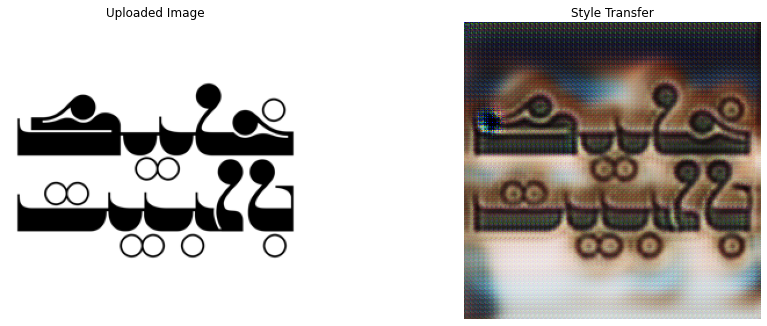

In [163]:
#Step 5.4
#Plot the results

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

rows = 2
columns = 2

img = plt.imread('./results/styleTransfer2/test_latest/images/test4_real.png')
img2 = plt.imread('./results/styleTransfer2/test_latest/images/test4_fake.png')

fig.add_subplot(rows, columns, 1)

plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('off')
plt.title("Style Transfer")


### **STEP 06: <br>LOAD YOUR OWN CALLIGRAPHY**

In [36]:
#Step 6.1
#Create a new folder for the checkpoint we want to use.
#Source: https://stackoverflow.com/questions/1274405/how-to-create-new-folder

UploadImgFolder = r'/content/pytorch-CycleGAN-and-pix2pix/checkpoints/UploadedImages'
os.makedirs(UploadImgFolder)

UploadImgDataset= r'/content/pytorch-CycleGAN-and-pix2pix/datasets/UploadedImages'
os.makedirs(UploadImgDataset)

In [ ]:
#Step 6.2
#Copy checkpoint
#Source: https://stackoverflow.com/questions/123198/how-to-copy-files

shutil.copyfile("/content/pytorch-CycleGAN-and-pix2pix/checkpoints/styleTransfer/45_net_G_A.pth", "/content/pytorch-CycleGAN-and-pix2pix/checkpoints/UploadedImages/45_net_G_A.pth")

In [ ]:
#Step 6.3

os.rename("/content/pytorch-CycleGAN-and-pix2pix/checkpoints/UploadedImages/45_net_G_A.pth","/content/pytorch-CycleGAN-and-pix2pix/checkpoints/UploadedImages/latest_net_G.pth")

Saving 5db3c7c54e145ec0b8869bfcfe4d28a2.jpg to 5db3c7c54e145ec0b8869bfcfe4d28a2.jpg


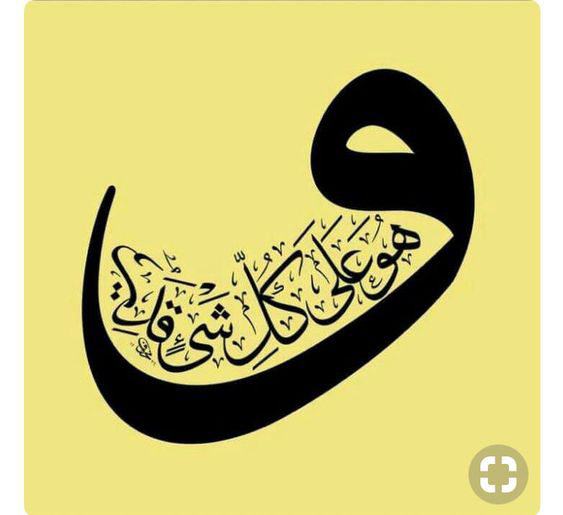

In [147]:
#Step 6.4
#Upload Your own calligraphy in PNG format only
#Source: https://colab.research.google.com/drive/1AG19IKJ_J28-LjjOo2ntY1uLsMDHEuAs#scrollTo=N2RBLT6rYBAJ

from google.colab import files
from io import BytesIO

def img_from_local():
  uploaded = files.upload()
  filename = list(uploaded)[0]
  return BytesIO(uploaded[filename])

img_local = Image.open(img_from_local())
img_local.save('/content/pytorch-CycleGAN-and-pix2pix/datasets/UploadedImages/uploaded.png','PNG')
img_local

In [ ]:
#Step 6.5

!pip install dominate

In [148]:
#Step 6.6
#Apply a style transfer on your image

!python test.py --dataroot datasets/UploadedImages/ --name styleTransfer --model test --no_dropout 
!python test.py --dataroot datasets/UploadedImages/ --name UploadedImages --model test --no_dropout 

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/UploadedImages/      	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

Text(0.5, 1.0, 'Style Transfer: Second Round')

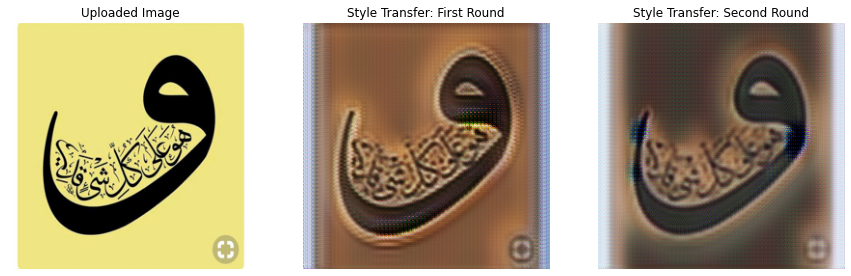

In [149]:
#Step 6.7
#Display Results

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

rows = 2
columns = 3

img = plt.imread('./results/UploadedImages/test_latest/images/uploaded_real.png')
img2 = plt.imread('./results/styleTransfer/test_latest/images/uploaded_fake.png')
img3 = plt.imread('./results/UploadedImages/test_latest/images/uploaded_fake.png')


fig.add_subplot(rows, columns, 1)

plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('off')
plt.title("Style Transfer: First Round")

fig.add_subplot(rows, columns, 3)

plt.imshow(img3)
plt.axis('off')
plt.title("Style Transfer: Second Round")